In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats

import seaborn as sn
import matplotlib.pyplot as plt
plt.style.use('ggplot')
!pwd

/home/matt/portfolio/personal_portfolio/spotify


In [3]:
# Import spotify data
tracks = pd.read_csv('./data/tracks.csv')
artists = pd.read_csv('./data/artists.csv')

In [7]:
artists

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,3345.0,[],Cody Longo,8
1104345,1ljurfXKPlGncNdW3J8zJ8,2123.0,['deep acoustic pop'],Right the Stars,18
1104346,2vnT9YhKIvjVo9LnVjWmr2,26.0,[],Jesse Giddings,0
1104347,3ID0E5XCvnJIYZEq043ZoB,406.0,[],The Boy Band Project,0


In [8]:
# Data cleaning

# not all artists have genre tags -- remove them
genre_df = artists[artists['genres'] != '[]'].copy()
print(genre_df.shape)

# clean and split genre tags
genre_df['genres'] = genre_df.loc[:, 'genres'].str.strip("[]")
genre_split = genre_df.assign(genres=genre_df['genres'].str.split(', ')).explode('genres')
genre_split['genres'] = genre_split.loc[:, 'genres'].str.strip("'")

(298616, 5)


                     genres  genre_count
1216              dance pop          572
3877                    pop          568
4210                   rock          564
1586          electro house          558
1050  classical performance          502
2885                  latin          498
2371             indie rock          485
2216                hip hop          484
3899                pop rap          467
4079                    rap          461


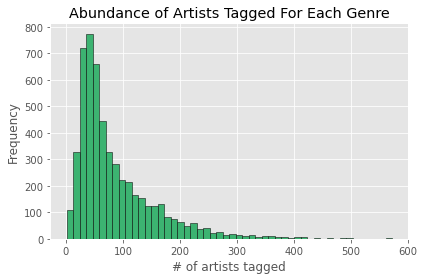

In [14]:
# Create a new dataframe for genre counts

genre_count = genre_split.groupby('genres').count().copy()
genre_count['genre_count'] = genre_count['id']
genre_count = genre_count.reset_index()
genre_count = genre_count[['genres', 'genre_count']]
print(genre_count.sort_values('genre_count', ascending=False).head(10))

# How common are genres typically?

fig, ax = plt.subplots()
ax.hist(genre_count['genre_count'], bins=50, color='mediumseagreen', histtype='bar', ec='black')
ax.set_xlabel('# of artists tagged')
ax.set_ylabel('Frequency')
ax.set_title('Abundance of Artists Tagged For Each Genre')
# ax.vlines(genre_count['genre_count'].quantile(0.5), 0, 800, colors='black',linestyles='dashed', label='50th percentile')
# ax.legend(facecolor='white')
plt.tight_layout()
plt.savefig('/home/matt/personal_projects/spotify/img/genre_count_histogram.png')

,id,followers,genres,name,popularity
45,0VLMVnVbJyJ4oyZs2L3Yl2,71.0,carnaval cadiz,Las Viudas De Los Bisabuelos,6
46,0dt23bs4w8zx154C5xdVyl,63.0,carnaval cadiz,Los De Capuchinos,5
47,0pGhoB99qpEJEsBQxgaskQ,64.0,carnaval cadiz,Los “Pofesionales”,7
48,3HDrX2OtSuXLW5dLR85uN3,53.0,carnaval cadiz,Los Que No Paran De Rajar,6
136,22mLrN5fkppmuUPsHx6i2G,59.0,classical harp,Vera Dulova,3
...,...,...,...,...,...
1104328,1q9C5XlekzXbRLIuLCDTre,90087.0,teen pop,Brent Rivera,33
1104331,4fh2BIKYPFvXFsQLhaeVJp,309.0,la indie,Lone Kodiak,20
1104334,7akMsd2vb4xowNTehv3gsY,774.0,indie rockism,The Str!ke,0
1104336,35m7AJrUCtHYHyIUhCzmgi,205.0,indie rockism,Hunter Fraser,6
